In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as LA
import networkx.linalg.algebraicconnectivity as alg
import collections 
import math
import pandas as pd
import networkx as nx 

In [2]:
def pagerank(P, gamma, reward):
    
    n = np.size(P, 1)
    V_1 = np.dot(reward,(1 - gamma)*(np.linalg.inv(np.eye(n) - gamma*P)))
    
    '''for i in range(1000):
        
        V_2 = gamma*np.dot(P,V_1) +(1-gamma)*reward
        if(np.max(np.abs(V_1 - V_2)) < epsilon):
            return V_2
        V_1 = V_2'''
    return V_1

In [3]:
def ncut(cluster_name, w, n):
    
    cluster_name = np.asarray(cluster_name)
    cluster_name = np.reshape(cluster_name, (1,n))
    
    mull_1 = cluster_name
    mull_2 = np.ones((1,n)) - mull_1
    
    w_1 = np.dot(mull_1, np.dot(w, np.ones((n,1))))
    w_2 = np.dot(mull_2, np.dot(w, np.ones((n,1))))
    
    
    cut = np.dot(mull_1, np.dot(w,mull_2.T))
    #print(cut, w_1,w_2)
    
    ans = cut*(1/w_1 + 1/w_2)
    ans_1 = cut/min(w_1, w_2)
    
    return ans[0][0], ans_1[0][0] 


In [4]:
def get_sweep_cut_pagerank(W):
    
    gamma = 0.5
    start = 1
    
    n = np.size(W, 1)
    D = W.sum(axis = 1)
    zero_entries = np.where(D == 0)[0]
    D[zero_entries] = 1
    D_1 = np.reciprocal(D)
    D_1 = np.diag(D_1)  
    D = np.diag(D)
    P = np.dot(W, D_1)
    
    X_s = np.zeros((1,n))
    X_s[0][start] = 1
    V = pagerank(P, gamma, X_s)
    #print(V)
    order = np.argsort(np.dot(V,D_1), axis = 1)[0]
    print(order)
    threshold_index = 0
    best_conductance = 2
    cluster_name = [0]*n
    clusters = [[], []]

    
    for i in range(0, n - 1):

        cluster_name[order[i]] = 1
        nc, c = ncut(cluster_name, W, n)
        #print(i, nc, c, best_conductance)
        if(c <= best_conductance):
            best_conductance = c
            threshold_index = i

    cluster_name = [0]*n

    for i in range(0,threshold_index + 1):
        cluster_name[order[i]] = 1

    for i in range(0, n):
        clusters[cluster_name[i]].append(i)

    # this part changes the cluster_name from a list to numpy array (This step helps to write easy codes)
    cluster_name = np.asarray(cluster_name)
    cluster_name = np.reshape(cluster_name, (1,n))
    #print(deg)

    return best_conductance

In [5]:
def get_matrix(graph, n):
    
    w = np.zeros((n, n))
   
    for x in graph.keys() :
        for y in graph[x]:
            w[x][y] = 1
            w[y][x] = 1

    return w
    

In [6]:
def show_graph_with_labels(adjacency_matrix):
    G = nx.from_numpy_matrix(adjacency_matrix) 
    nx.draw(G, with_labels=True)


In [7]:
graph = [{0 : [1],
         1 : [2],
         2 : [3],
         3 : [4],
         4 : [5],
         5 : [6],
         6 : [7],
         7 : [6],
             },
        8]

In [8]:
W = get_matrix(graph[0], graph[1])

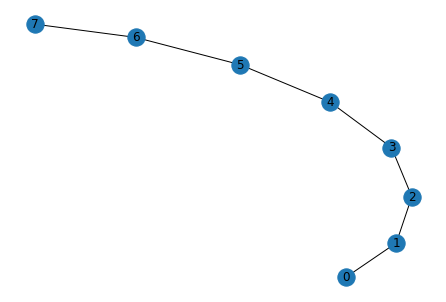

In [9]:
show_graph_with_labels(W)

In [10]:
'''clusters, cluster_name = get_sweep_cut(W)
nc, c = ncut(cluster_name, W, 8)
print(nc, c)'''
print(get_sweep_cut_pagerank(W))

[6 7 5 4 3 2 0 1]
0.14285714285714285
